# M-separation for Regression chain graphs

## Definition

It is a generalization of the d-separation criterion for DAGs (Pearl, 1988). This is a graphical criterion that checks if the graph contains special paths connecting two sets A and B and involving a third set C of the nodes. These special paths are said to be *active* or *m-connecting*. For example, a directed path from a node in A to a node in B that does not contain any node of C is m-connecting A and B. 

However, if such a path intercepts a node in C then A and B are said to be m-separated given C. But this behaviour can change if the path connecting A and B contains a *collision node* or a *collider* for short, that is a node $m$ where the edges meet head-to-head, like e.g., $\rightarrow m \leftarrow$ or $\rightarrow m \leftrightarrow$
or $\leftrightarrow m \leftrightarrow$ .

In general, a path is said to be $m$-connecting given C if all its collider nodes are in C or in the set of ancestors of C, and all its non-collider nodes are outside C. 

For two disjoint subsets A and B of the node set, we say that C $m$-separates A and B if there is no m-connecting path between A and B given C.

The $m$-separation criterion has been implemented in **ggm** and is available by using the function `msep`. Note that there is still a function `dSep` in **ggm** for $d$-separation, although it is superseded by `msep`.

## Example

In [11]:
library("ggm")
library("igraph")

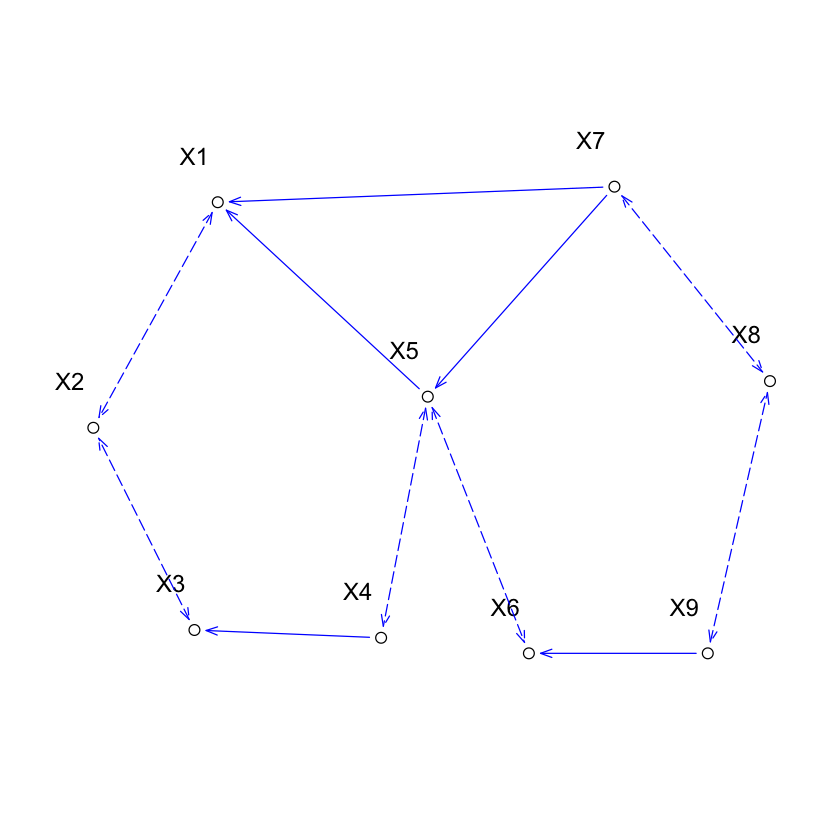

In [12]:
R <- makeMG(
    bg =  UG(~ X1 * X2 + X2 * X3 + X4 * X5 + X5 * X6 + X7 * X8 + X8 * X9),
    dg = DAG(X1 ~ X5 + X7, X3 ~ X4, X5 ~ X7, X6 ~ X9)
)
co <- structure(c(24, 51, 75, 21, 45, 64, 87, 8, 95, 78, 53, 80, 23, 22, 20, 20, 49, 55), dim = c(9L, 2L))
drawGraph(R, coor = co)

In [3]:
msep(R, "X1", "X3", c("X4", "X5", "X7"))

[1] TRUE

In [4]:
msep(R, "X1", c("X6", "X8", "X9"), c("X4", "X5", "X7"))

[1] TRUE

In [7]:
msep(R, "X2", c("X4", "X5", "X7"))

[1] TRUE

In [8]:
msep(R, "X3", c("X5", "X7"), "X4")

[1] TRUE

In [9]:
msep(R, c("X1", "X2"), "X4", c("X5", "X7"))

[1] TRUE

In [10]:
msep(R, c("X2", "X3"), c("X5","X7"), "X4")

[1] TRUE